# Data Madness
### Rodrigo Alejandro Chávez Mulsa & Lillian Alice Wu

Data retrieved from: https://www.kaggle.com/mohalim/video-games-sales

Grading rubric:

* Key idea: Do you have main takeaways?
* Scope: Given the dataset selected, did you choose the appropriate level of complexity to explain everything?
* Process: Did you follow the standard data analysis process (EDA, models, evaluation)?
* Solution: Is the analysis effective and answering the intended questions?
* Presentation: Is your video clear, engaging and effective? Questions: Did you answer them properly? 

*Use this assignment to submit a link where your video is to be found (e.g. youtube, vimeo, etc.) and submit a 1/2-1 page abstract of your approach. Mention your partner (you do not need to do double submissions).*


## Questions we answer:

* What are the genres that are more likely to get a high rating? And does it
differ between regions?
* Does the release time of the year has a correlation with the sales?
* Does user rating reflect more on the sales or is it the critics rating?
* How does the popularity of platforms change throughout the years?

In [1]:
import IPython.core.display
import matplotlib
def apply_styles():
    matplotlib.rcParams['font.size'] = 12
    matplotlib.rcParams['figure.figsize'] = (18, 6)
    matplotlib.rcParams['lines.linewidth'] = 1
    matplotlib.rcParams['axes.grid'] = True
    matplotlib.rcParams['grid.color'] = 'k'
    matplotlib.rcParams['grid.linestyle'] = ':'
    matplotlib.rcParams['grid.linewidth'] = 0.5

apply_styles()

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')


In [2]:
df = pd.read_csv("data/vgsales.csv")
# df.value.astype(int, copy=False);
df.shape

(16719, 16)

In [3]:
df.head(5)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,NaN,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,NaN,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# df.Year_of_Release.value_counts()
# df.shape
# df.loc[0]

### Deal with missing values and wrong types

In [5]:
df.Name.isnull()
df = df[df['Name'].notna()]
# df.User_Score.isnull().sum()

In [6]:
#non-numeric value convert to NaN
df['User_Score'] = df['User_Score'].apply(pd.to_numeric, errors='coerce')
# df.dtypes

In [7]:
df[['Publisher', 'Developer','Rating']]=df[['Publisher', 'Developer','Rating']].fillna(value='missing')
df[['Year_of_Release','Critic_Count', 'Critic_Score', 'User_Count']] = df[['Year_of_Release','Critic_Count', 'Critic_Score', 'User_Count']].astype('Int64')
# df.dtypes

In [8]:
cols_float = df.select_dtypes(include=['number']).columns
df[cols_float] = df[cols_float].fillna(-1)
df.head(5)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,-1.00,82.53,76,51,8.0,322,Nintendo,E
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,-1,-1,-1.0,-1,missing,missing
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82,73,8.3,709,Nintendo,E
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,-1.00,32.77,80,73,8.0,192,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,-1,-1,-1.0,-1,missing,missing


In [9]:
#Compute missing global sales based on sales in available regions
for i, r in df.iterrows():
    if r.Global_Sales<0:
        df.Global_Sales.at[i] = sum(r[c] if (('Sales' in c) and (r[c]>0)) else 0 for c in r.index)
df[df.Global_Sales<0]
df.head(5)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,-1.00,82.53,76,51,8.0,322,Nintendo,E
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,-1,-1,-1.0,-1,missing,missing
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82,73,8.3,709,Nintendo,E
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,-1.00,32.77,80,73,8.0,192,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,-1,-1,-1.0,-1,missing,missing


## Visualize stuff

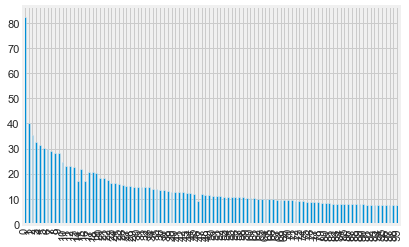

In [10]:
df.sort_values(by=['Global_Sales'],ascending=False)
df.Global_Sales[:100].plot.bar()

In [11]:
df[df['Name'] == 'Monopoly']

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
658,Monopoly,PC,1994,Misc,Hasbro Interactive,1.49,0.81,0.0,0.10,2.39,-1,-1,-1.0,-1,missing,missing
913,Monopoly,Wii,2008,Misc,Electronic Arts,0.86,0.83,0.0,0.20,1.89,70,11,7.8,17,Electronic Arts,E
1250,Monopoly,PS,1997,Misc,Hasbro Interactive,1.18,0.27,0.0,-1.00,1.51,-1,-1,-1.0,-1,missing,missing
3383,Monopoly,X360,2008,Misc,Electronic Arts,0.34,0.20,0.0,0.06,0.59,56,9,5.8,17,EA Bright Light,E
4522,Monopoly,PS2,2008,Misc,Electronic Arts,0.21,0.16,0.0,0.05,0.43,-1,-1,7.2,6,Electronic Arts,E
5390,Monopoly,PS3,2008,Misc,Electronic Arts,0.25,-1.00,0.0,0.04,0.34,54,4,6.7,13,Electronic Arts,E
6342,Monopoly,DS,2010,Misc,Electronic Arts,-1.00,0.09,0.0,0.02,0.27,-1,-1,-1.0,-1,missing,missing
7399,Monopoly,N64,1999,Misc,Hasbro Interactive,0.17,0.04,0.0,0.00,0.21,-1,-1,-1.0,-1,missing,missing


In [12]:
df.Platform.unique()
# df[df.Platform=='PC']

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [13]:
df_genre = df.groupby(['Genre','Name'])

In [14]:
# df_genre.first()#[df_genre.Name == 'Minecraft']
df['Genre']= df['Genre'].astype('category')
genres = df.Genre.cat.categories
print(genres)

Index(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'],
      dtype='object')


In [ ]:
df_year_platf = df.groupby('Year_of_Release').Platform.value_counts()

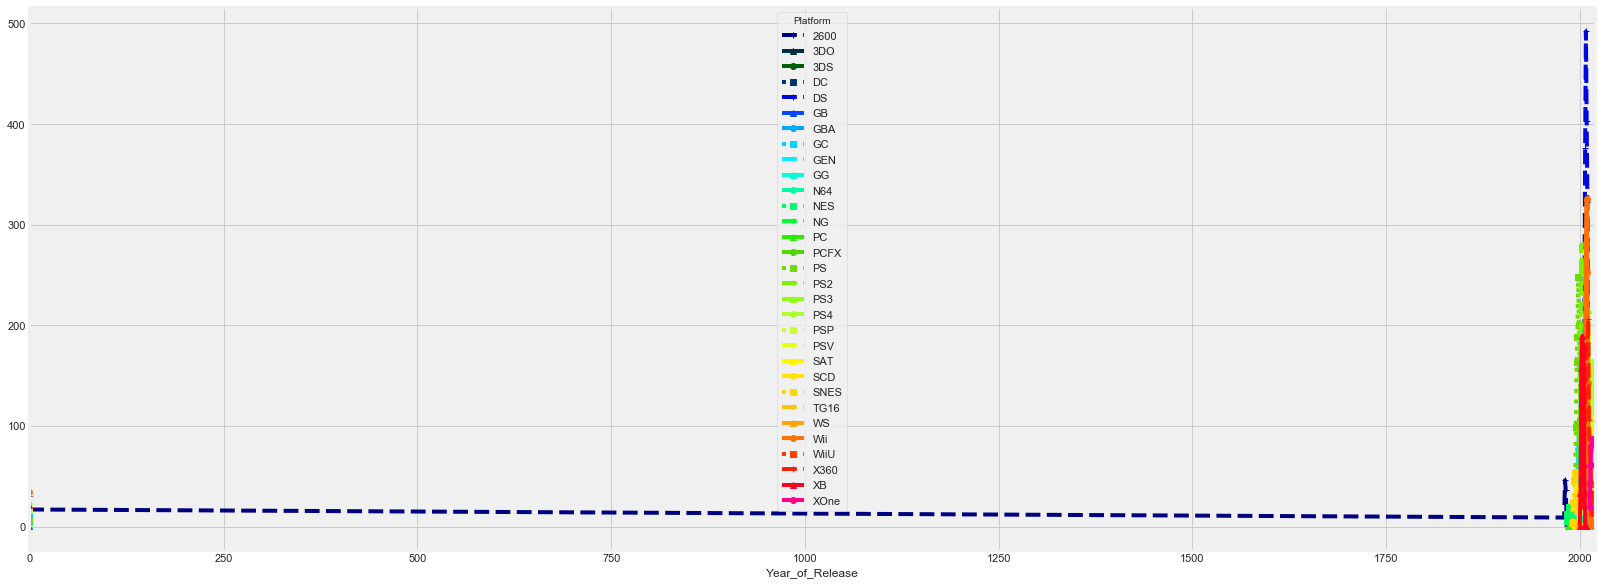

In [15]:

number_of_plots = len(df.Year_of_Release.unique())
colormap = plt.cm.gist_ncar 
linestyle = ["+--","^-",'-o',':s']*10
colors = [colormap(i) for i in np.linspace(0, 1,number_of_plots)]
df_year_platf.unstack().plot(kind='line',style=linestyle,figsize=(25,10), stacked=False,color = colors)
plt.show()